### Analiza sprzedaży E-commerce w Indiach (na podstawie Amazon Sales Report)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("sales.csv", low_memory = False)


### Obróbka danych

In [3]:
df.dtypes
df.drop('Unnamed: 22', axis=1, inplace=True)
column_names = df.columns
print(column_names)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].astype(object)
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code              object
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
dtype: object

### 1) Status zamówień

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64


<Axes: >

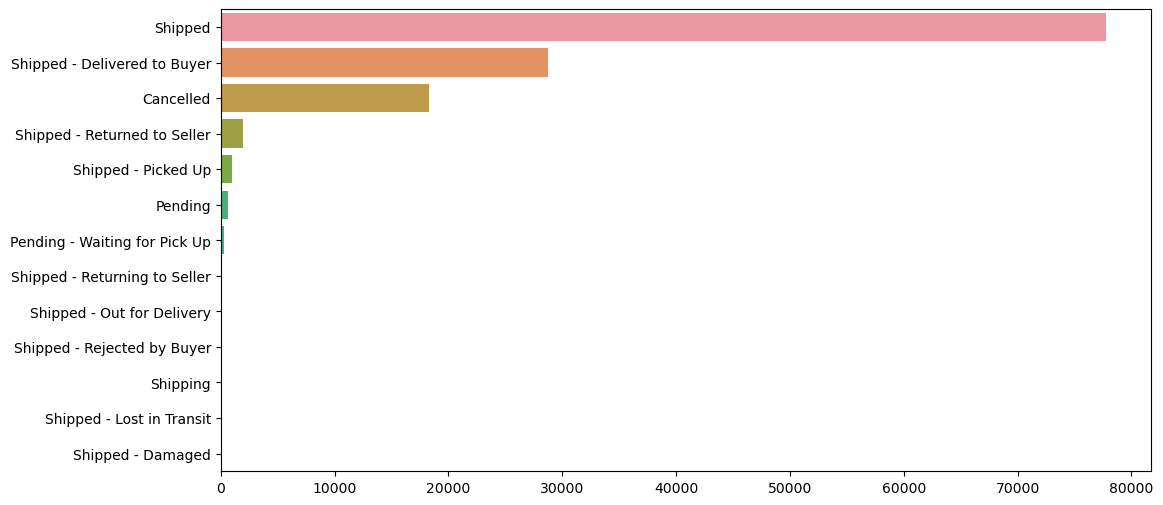

In [5]:
df2 = df['Status']
df2.unique()
status_counts = df['Status'].value_counts()
print(status_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=status_counts.values, y=status_counts.index, orient = 'h')

### 2) Rozmiary ubrań

In [6]:
size_counts = df['Size'].value_counts()        
print(size_counts)

M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: Size, dtype: int64


Text(0.5, 1.0, 'Rozmiary zamawianych ubrań')

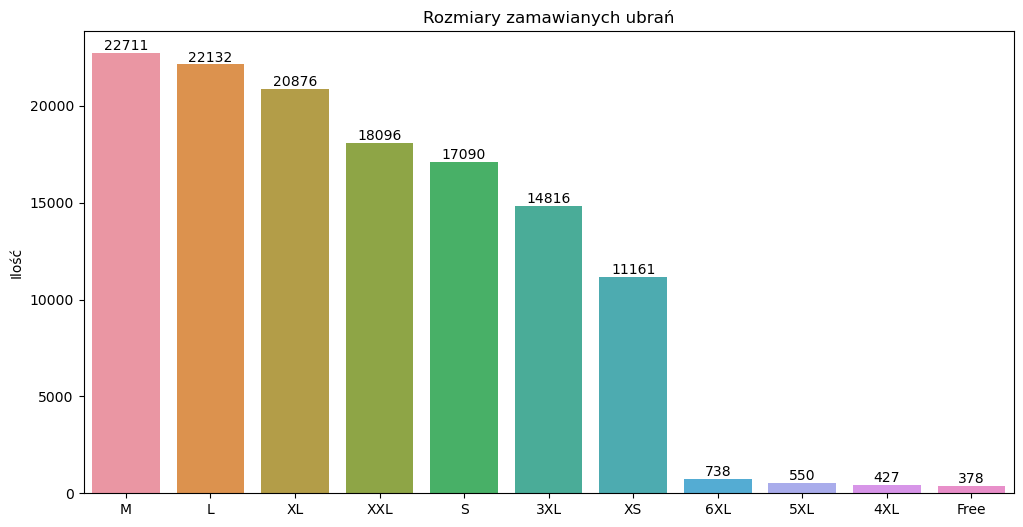

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=size_counts.index, y=size_counts.values, orient = 'v')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Ilość')

plt.title('Rozmiary zamawianych ubrań')

### 3) Kategorie ubrań

Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: Category, dtype: int64


Text(0.5, 1.0, 'Zamawiane ubrania według kategorii')

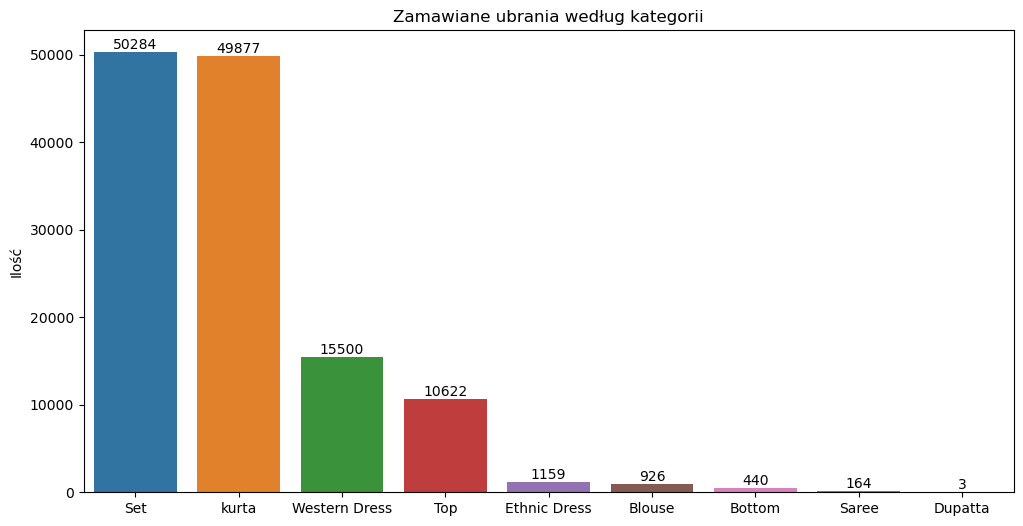

In [8]:
category_counts = df['Category'].value_counts()
print(category_counts)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, orient = 'v')
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Ilość')

plt.title('Zamawiane ubrania według kategorii')

### 4) Zyski i straty według kategorii ubrań

In [9]:
gains = ['Shipped', 'Shipped - Delivered to Buyer']
gains_df = df[df['Status'].isin(gains)]

gains_by_category = gains_df.groupby('Category')['Amount'].sum().reset_index()

losses = ['Cancelled', 
          'Shipped - Returned to Seller', 
          'Shipped - Returning to Seller', 
          'Shipped - Rejected by Buyer', 
          'Shipped - Lost in Transit', 
          'Shipped - Damaged']

losses_df = df[df['Status'].isin(losses)]

losses_by_category = losses_df.groupby('Category')['Amount'].sum().reset_index()
losses_by_category['Amount'] = -losses_by_category['Amount']

pending = ['Shipped - Picked Up', 
           'Pending', 
           'Pending - Waiting for Pick Up', 
           'Shipped - Out for Delivery', 
           'Shipping']

pending_df = df[df['Status'].isin(pending)]

pending_by_category = pending_df.groupby('Category')['Amount'].sum().reset_index()

merged_df = pd.merge(gains_by_category, losses_by_category, on='Category')
merged_df = merged_df.rename(columns={'Amount_x': 'Profits', 'Amount_y': 'Losses'})
merged_df = merged_df.sort_values(by= 'Profits', ascending = False)
merged_df

,Category,Profits,Losses
4,Set,34374975.0,-4172602.03
7,kurta,18783882.0,-2219277.70
6,Western Dress,9688475.0,-1258658.69
5,Top,4760164.0,-512096.30
2,Ethnic Dress,714913.0,-70162.66
0,Blouse,408805.0,-46747.18
1,Bottom,130001.0,-17193.98
3,Saree,112940.0,-10237.76


Text(0.5, 1.0, 'Zyski i straty według kategorii ubrań')

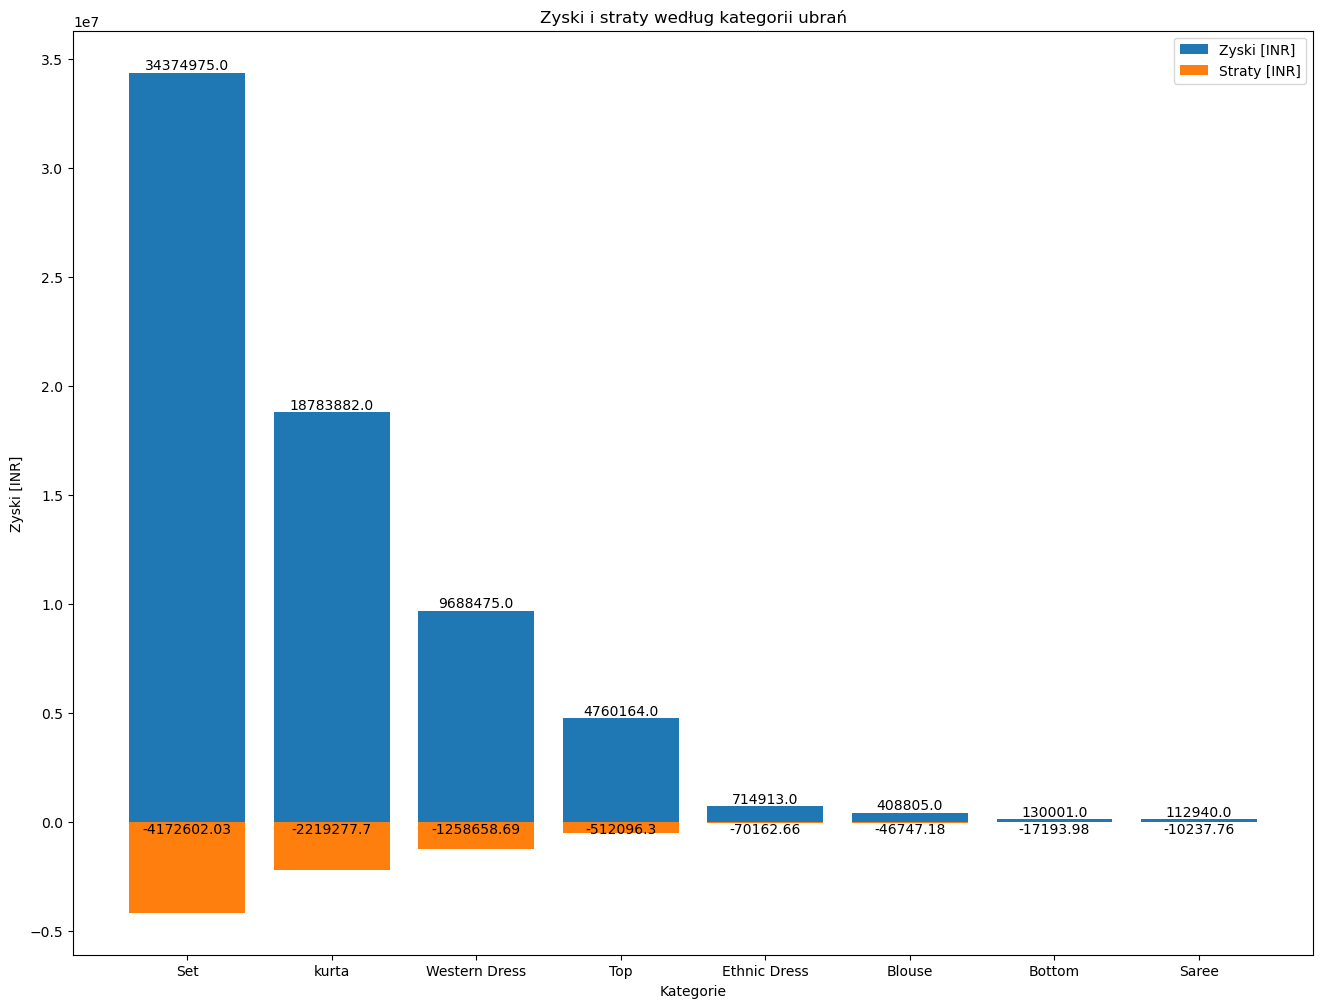

In [10]:
plt.figure(figsize=(16, 12))

bars1 = plt.bar(merged_df['Category'], merged_df['Profits'], label='Zyski [INR]')
bars2 = plt.bar(merged_df['Category'], merged_df['Losses'], label='Straty [INR]')

for bar, profit, loss in zip(bars1, merged_df['Profits'], merged_df['Losses']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{profit}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, -5000, f'{loss}', ha='center', va='top')
    
plt.xlabel('Kategorie')
plt.ylabel('Zyski [INR]')
plt.legend()
plt.title('Zyski i straty według kategorii ubrań')



### 5) Zyski i straty według rozmiarów ubrań

Text(0.5, 1.0, 'Zyski i straty według rozmiarów ubrań')

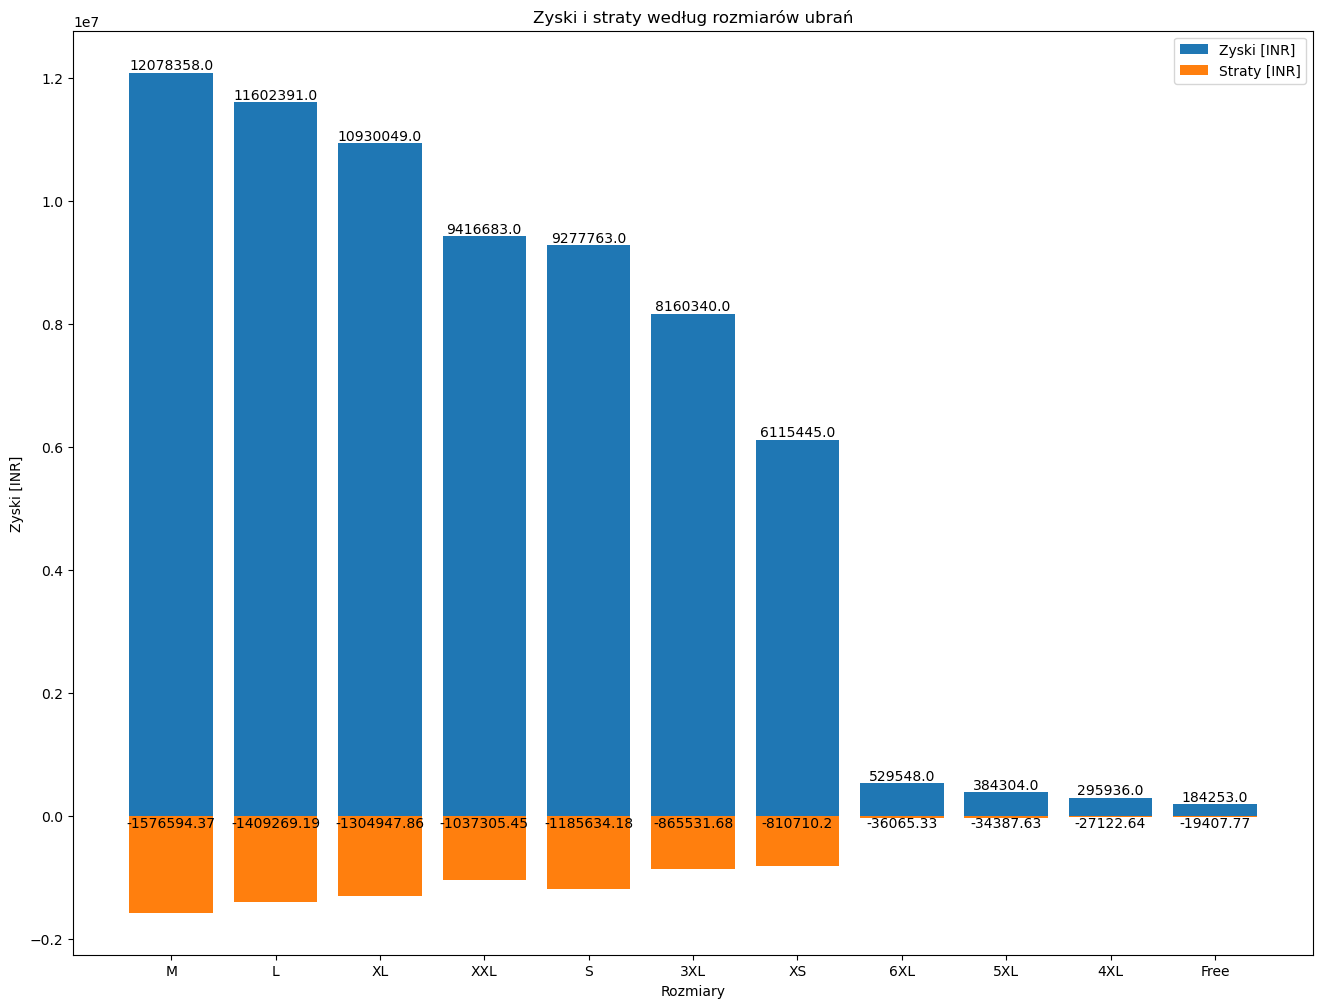

In [11]:
gains_by_size = gains_df.groupby('Size')['Amount'].sum().reset_index()

losses_by_size = losses_df.groupby('Size')['Amount'].sum().reset_index()
losses_by_size['Amount'] = -losses_by_size['Amount']

merged_df = pd.merge(gains_by_size, losses_by_size, on='Size')
merged_df = merged_df.rename(columns={'Amount_x': 'Profits', 'Amount_y': 'Losses'})
merged_df = merged_df.sort_values(by= 'Profits', ascending = False)
merged_df

plt.figure(figsize=(16, 12))

bars1 = plt.bar(merged_df['Size'], merged_df['Profits'], label='Zyski [INR]')
bars2 = plt.bar(merged_df['Size'], merged_df['Losses'], label='Straty [INR]')

for bar, profit, loss in zip(bars1, merged_df['Profits'], merged_df['Losses']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{profit}', ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, -10000, f'{loss}', ha='center', va='top')
    
plt.xlabel('Rozmiary')
plt.ylabel('Zyski [INR]')
plt.legend()
plt.title('Zyski i straty według rozmiarów ubrań')

### 6) Najważniejsze regiony wysyłkowe

In [12]:
gains_by_states = gains_df.groupby('ship-state')['Amount'].sum().reset_index()
gains_by_states = gains_by_states.sort_values(by= 'Amount', ascending = False)
pd.set_option('display.max_rows', None)
gains_by_states['ship-state'].replace({'Pondicherry': 'PUDUCHERRY','rajsthan': 'RAJASTHAN','orissa': 'ODISHA','Arunachal pradesh': 'ARUNACHAL PRADESH','Rajsthan': 'RAJASTHAN','Punjab/Mohali/Zirakpur': 'PUNJAB','Puducherry': 'PUDUCHERRY','AR': 'ARUNACHAL PRADESH','Rajshthan': 'RAJASTHAN','Nagaland': 'NAGALAND','Orissa': 'ODISHA','NL': 'NAGALAND', 'Arunachal Pradesh': 'ARUNACHAL PRADESH', 'bihar': 'BIHAR', 'goa': 'GOA', 'Manipur': 'MANIPUR', 'Sikkim': 'SIKKIM','rajasthan': 'RAJASTHAN',  'PB': 'PUNJAB', 'RJ': 'RAJASTHAN', 'delhi': 'DELHI', 'New Delhi': 'DELHI', 'Gujarat': 'GUJARAT', 'Rajasthan': 'RAJASTHAN', 'Delhi': 'DELHI', 'Punjab': 'PUNJAB', 'Bihar': 'BIHAR', 'Goa': 'GOA', 'punjab': 'PUNJAB', 'Odisha': 'ODISHA', 'Chandigarh': 'CHANDIGARH' }, inplace=True)
gains_by_states = gains_by_states.groupby('ship-state')['Amount'].sum().reset_index()
gains_by_states = gains_by_states.sort_values(by= 'Amount', ascending = True)
gains_by_states
top_10_states = gains_by_states.head(10)

Text(0.5, 1.0, 'Najważniejsze regiony wysyłkowe')

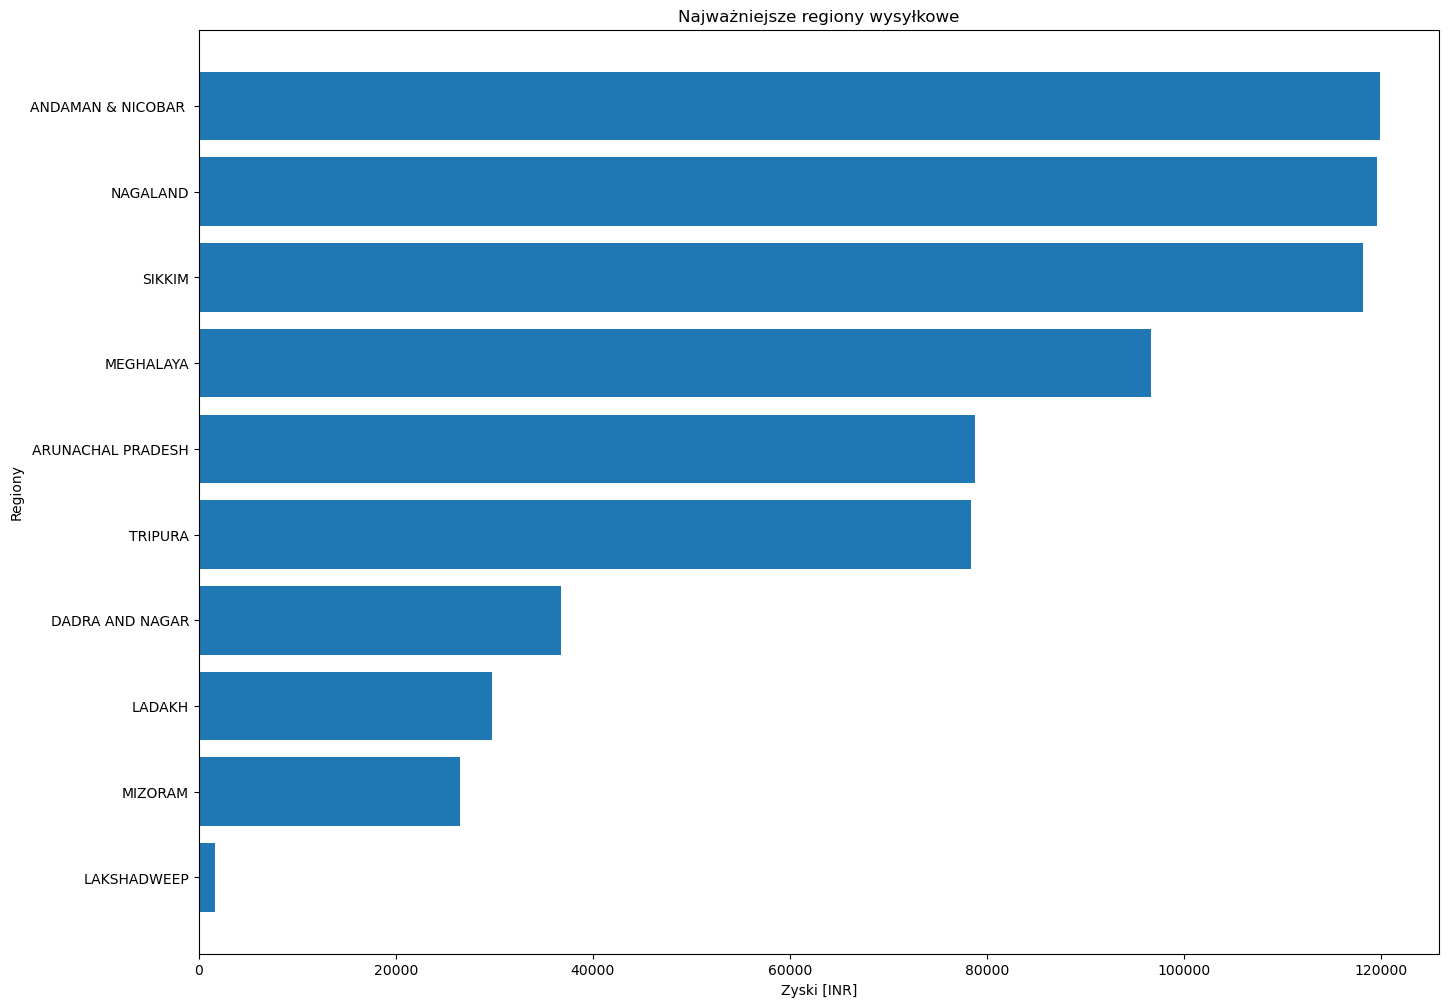

In [13]:
plt.figure(figsize=(16, 12))

bars1 = plt.barh(top_10_states['ship-state'], top_10_states['Amount'], label='Zyski [INR]')
plt.xlabel('Zyski [INR]')
plt.ylabel('Regiony')
plt.title('Najważniejsze regiony wysyłkowe')

### 7) Bestsellery według kategorii

In [14]:
gains_by_style = gains_df.groupby('Style')['Amount'].sum().reset_index()
gains_by_style = gains_by_style.sort_values(by= 'Amount', ascending = False)

style_by_category = df[['Style', 'Category']]
style_by_category

merged_df = pd.merge(gains_by_style, style_by_category, on='Style')
merged_df = merged_df.drop_duplicates()

for index, row in merged_df.iloc[1:].iterrows():
    if row['Category'] == 'Western Dress':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[2:].iterrows():
    if row['Category'] == 'Set':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[3:].iterrows():
    if row['Category'] == 'kurta':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[4:].iterrows():
    if row['Category'] == 'Top':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[5:].iterrows():
    if row['Category'] == 'Ethnic Dress':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[6:].iterrows():
    if row['Category'] == 'Blouse':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[7:].iterrows():
    if row['Category'] == 'Saree':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[8:].iterrows():
    if row['Category'] == 'Bottom':
        merged_df.drop(index, inplace=True)
for index, row in merged_df.iloc[9:].iterrows():
    if row['Category'] == 'Dupatta':
        merged_df.drop(index, inplace=True)
        
merged_df.reset_index(drop=True, inplace=True)    

Text(0.5, 1.0, 'Bestsellery wśród kategorii')

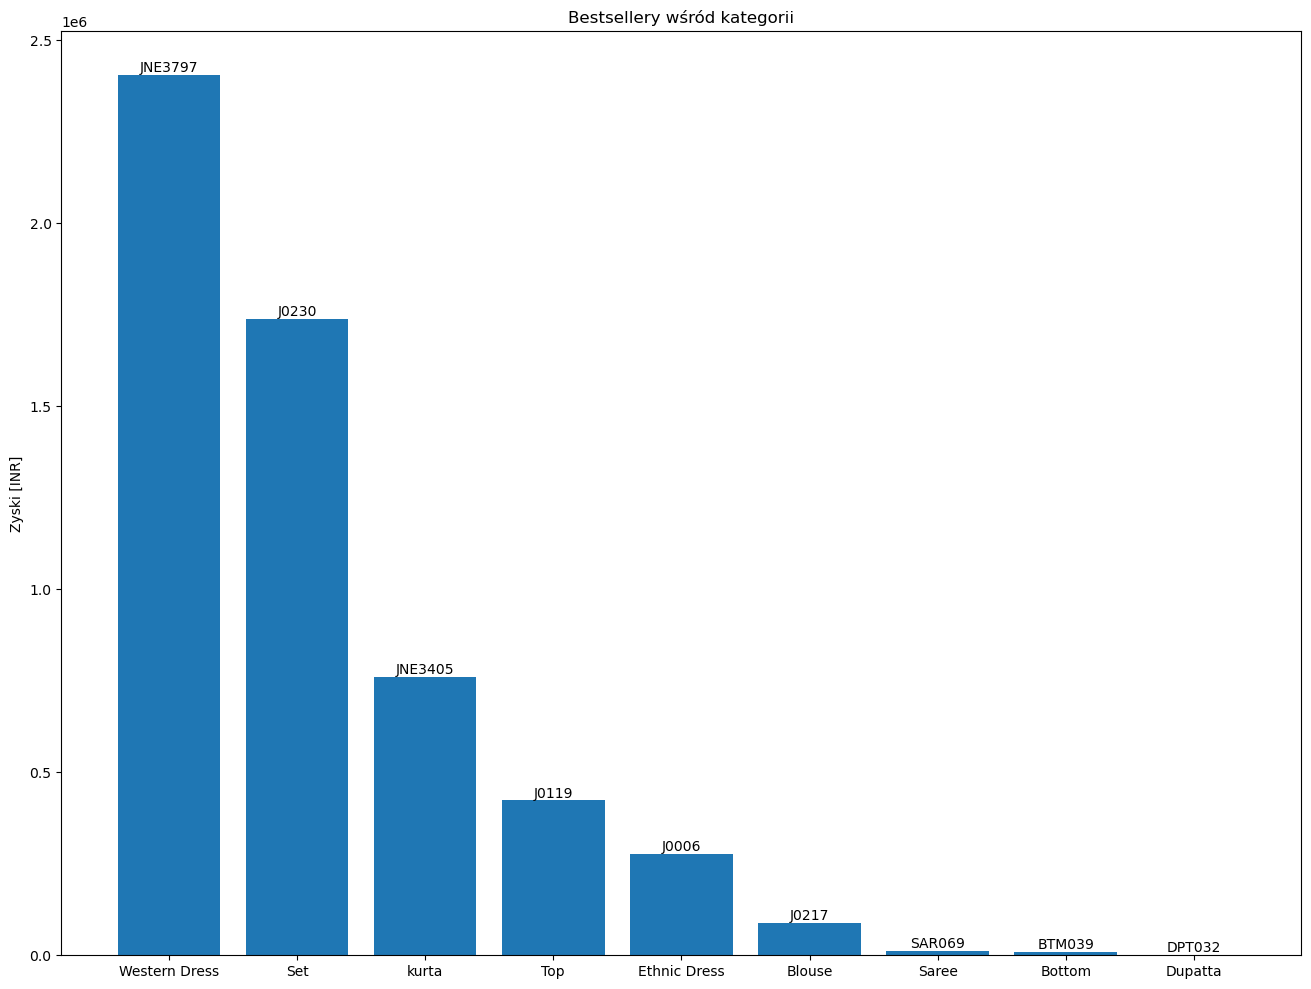

In [15]:
plt.figure(figsize=(16, 12))

ax = plt.bar(merged_df['Category'], merged_df['Amount'])
for i, amount in enumerate(merged_df['Amount']):
    plt.text(i, amount + 5, merged_df['Style'][i], ha='center', va='bottom') 

plt.ylabel('Zyski [INR]')
plt.title('Bestsellery wśród kategorii')

### 8) Dzienna sprzedaż JNE3797

In [16]:
df6 = df[['Date', 'Amount', 'Style','Status']]

bool_mask = df['Style'] == 'JNE3797'
bool_mask_2 = df['Status'] == 'Shipped'
bool_mask_3 = df['Status'] == 'Shipped - Delivered to Buyer'
filtered_df = df6[bool_mask]
shipped = filtered_df[bool_mask_2]
delivered = filtered_df[bool_mask_3]

daily_sales = pd.concat([shipped, delivered], axis=0)
del daily_sales['Style']
del daily_sales['Status']

daily_sales = df.groupby('Date')['Amount'].sum().reset_index()
daily_sales


C:\Users\MSI\AppData\Local\Temp\ipykernel_5900\1771807236.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shipped = filtered_df[bool_mask_2]
C:\Users\MSI\AppData\Local\Temp\ipykernel_5900\1771807236.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delivered = filtered_df[bool_mask_3]


,Date,Amount
0,2022-03-31,101683.85
1,2022-04-01,865478.60
2,2022-04-02,913101.53
3,2022-04-03,1011763.38
4,2022-04-04,882059.17
5,2022-04-05,950544.05
6,2022-04-06,886985.26
7,2022-04-07,909899.35
8,2022-04-08,1018617.61
9,2022-04-09,972076.48


Text(0.5, 1.0, 'Dzienna sprzedaż JNE3797 (31-03.22 - 29.06.22)')

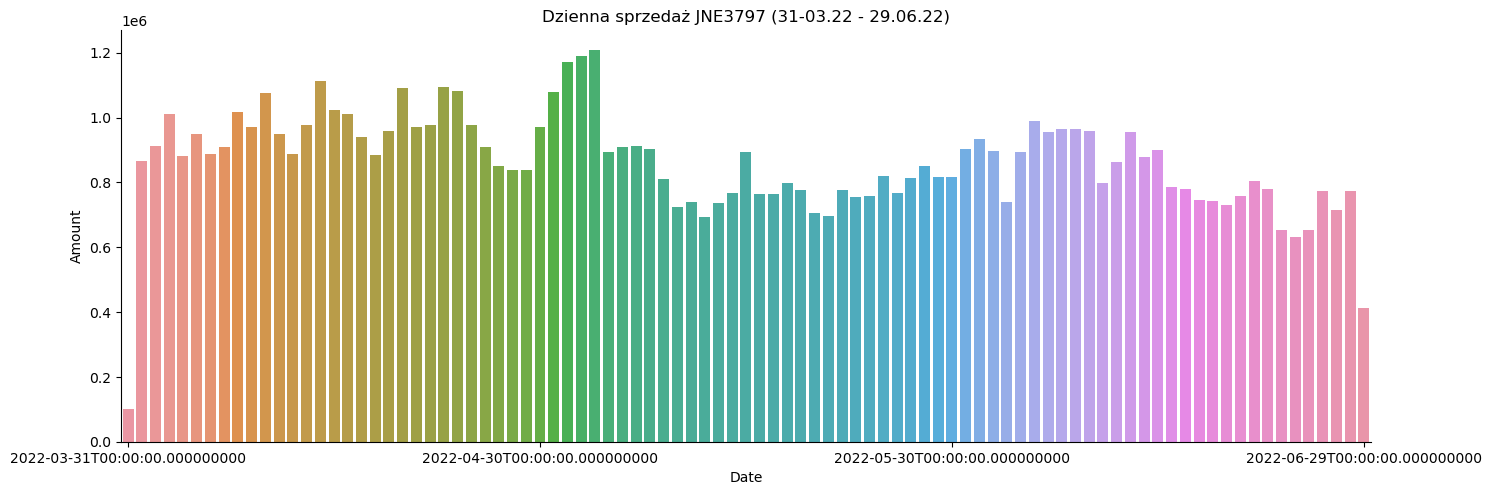

In [18]:

catplot = sns.catplot(x="Date", y="Amount", data=daily_sales, kind="bar", aspect=3)

ax = catplot.ax

step = 30  
xticks = range(0, len(daily_sales['Date'].unique()), step)
ax.set_xticks(xticks)
plt.title('Dzienna sprzedaż JNE3797 (31-03.22 - 29.06.22)')
